In [407]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime
import seaborn as sns
pd.options.display.max_rows = None

Carreguem a un dataframe les dades de precipitació corresponens a l'estació meteorológica ubicada al pantà de Darnius Boadella i facilitades pel Servei Català de Meteorologia MeteoCat.

In [361]:
datos = pd.read_csv('Darnius - Boadella.csv')
datos.head()

,DATA,PPT
0,01/01/2000,0
1,02/01/2000,0
2,03/01/2000,0
3,04/01/2000,0
4,05/01/2000,0


In [362]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8345 entries, 0 to 8344
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATA    8345 non-null   object
 1   PPT     8345 non-null   object
dtypes: object(2)
memory usage: 130.5+ KB


canviem les comes per punts i transformem les dades ded precipitació en numériques del tipus float.

In [363]:
datos['PPT'] = datos['PPT'].str.replace(',', '.').astype(float)

In [364]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8345 entries, 0 to 8344
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATA    8345 non-null   object 
 1   PPT     8345 non-null   float64
dtypes: float64(1), object(1)
memory usage: 130.5+ KB


Fem servir la columna corresponent a les dades diaries com a index del dataframe, definim una freqüencia diaria i omplenem els possibles buits de la serie històrica amb 0, doncs com que les dades no son continues no podem fer servir una mitja dels valors veïns per omplir els buits.

In [365]:
datos['DATA'] = pd.to_datetime(precip_df['DATA'], format='%d/%m/%Y')
datos = datos.set_index('DATA')
datos = datos.asfreq('D', fill_value = 0)
datos = datos.sort_index()

In [366]:
datos.head()

,PPT
DATA,
2000-01-01,0.0
2000-01-02,0.0
2000-01-03,0.0
2000-01-04,0.0
2000-01-05,0.0


Comprovem si hi ha cap NaN.

In [367]:
print(f'Número de filas con missing values: {datos.isnull().any(axis=1).mean()}')

Número de filas con missing values: 0.0


In [368]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8386 entries, 2000-01-01 to 2022-12-16
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPT     8386 non-null   float64
dtypes: float64(1)
memory usage: 131.0 KB


In [369]:
(datos.index == pd.date_range(
                    start = datos.index.min(),
                    end   = datos.index.max(),
                    freq  = datos.index.freq)
).all()

True

Com que el número d'observacions de la serie temporal de precipitacions té 3 dates més al final que la de la serie temporal de l'embassament, treuem aquestes 3 dades perque ambdues series siguin iguals.

In [370]:
datos.drop(datos.tail(3).index,
        inplace = True)

A continuació carreguem amb les dades de tots els embassaments de les conques internes de Catalunya, facilitades per l'Agencia Catalana de l'Aigua a un altre Dataframe. 

In [378]:
embassaments_df = pd.read_csv('embassaments.csv')
embassaments_df.head()

,Dia,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
0,13/12/2022,Embassament de Sant Ponç (Clariana de Cardener),518.36,45.4,11.08
1,13/12/2022,Embassament de Sau (Vilanova de Sau),390.13,18.5,30.65
2,13/12/2022,Embassament de Susqueda (Osor),321.88,43.9,102.18
3,13/12/2022,Embassament de la Baells (Cercs),598.41,28.1,30.77
4,13/12/2022,Embassament de Foix (Castellet i la Gornal),98.71,72.2,2.70


Com que només ens interessa l'embassament de Darnius - Boadella, copiarem les dades a un Dataframe nou.

In [379]:
datos2 = embassaments_df.loc[embassaments_df['Estació'] == 'Embassament de Darnius Boadella (Darnius)'].copy()

In [380]:
datos2.head()

,Dia,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
8,13/12/2022,Embassament de Darnius Boadella (Darnius),142.84,32.2,19.70
14,12/12/2022,Embassament de Darnius Boadella (Darnius),142.85,32.3,19.71
23,11/12/2022,Embassament de Darnius Boadella (Darnius),142.86,32.3,19.73
28,10/12/2022,Embassament de Darnius Boadella (Darnius),142.87,32.3,19.74
37,09/12/2022,Embassament de Darnius Boadella (Darnius),142.88,32.3,19.76


In [381]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8358 entries, 8 to 75341
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dia                             8358 non-null   object 
 1   Estació                         8358 non-null   object 
 2   Nivell absolut (msnm)           8358 non-null   float64
 3   Percentatge volum embassat (%)  8356 non-null   float64
 4   Volum embassat (hm3)            8356 non-null   float64
dtypes: float64(3), object(2)
memory usage: 391.8+ KB


Com vam fer amb la precipitació, farem servir la columna amb les dates com a index i posarem una freqüencia diaria.

In [382]:
datos2['Dia'] = pd.to_datetime(datos2['Dia'], format='%d/%m/%Y')
datos2 = datos2.set_index('Dia')
datos2 = datos2.asfreq('D', fill_value = 0)
datos2 = datos2.sort_index()

In [383]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8383 entries, 2000-01-01 to 2022-12-13
Freq: D
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Estació                         8383 non-null   object 
 1   Nivell absolut (msnm)           8383 non-null   float64
 2   Percentatge volum embassat (%)  8381 non-null   float64
 3   Volum embassat (hm3)            8381 non-null   float64
dtypes: float64(3), object(1)
memory usage: 327.5+ KB


In [385]:
datos2.head()

,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
Dia,,,,
2000-01-01,Embassament de Darnius Boadella (Darnius),147.27,50.8,31.02
2000-01-02,Embassament de Darnius Boadella (Darnius),147.27,50.8,31.02
2000-01-03,Embassament de Darnius Boadella (Darnius),147.27,50.8,31.02
2000-01-04,Embassament de Darnius Boadella (Darnius),147.27,50.8,31.02
2000-01-05,Embassament de Darnius Boadella (Darnius),147.28,50.8,31.04


Busquem els NaNs de la serie.

In [386]:
print(datos2.isnull().sum().sum())

4


In [387]:
null_columns=datos2.columns[datos2.isnull().any()]
datos2[null_columns].isnull().sum()
print(datos2[datos2.isnull().any(axis=1)].head())

                                              Estació  Nivell absolut (msnm)  \
Dia                                                                            
2022-04-04  Embassament de Darnius Boadella (Darnius)                 151.68   
2022-05-06  Embassament de Darnius Boadella (Darnius)                 152.54   

            Percentatge volum embassat (%)  Volum embassat (hm3)  
Dia                                                               
2022-04-04                             NaN                   NaN  
2022-05-06                             NaN                   NaN  


Busquem les dades concretes i les substituim per la mitja del valor previ i posterior.

In [ ]:
datos2.loc['2022-04-03 ':'2022-04-05 ']

In [ ]:
datos2.loc['2022-04-04 ','Percentatge volum embassat (%)'] = 63.95
datos2.loc['2022-04-04 ','Volum embassat (hm3)'] = 39.08

In [396]:
datos2.loc['2022-04-03 ':'2022-04-05 ']

,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
Dia,,,,
2022-04-03,Embassament de Darnius Boadella (Darnius),151.64,63.80,38.99
2022-04-04,Embassament de Darnius Boadella (Darnius),151.68,63.95,39.08
2022-04-05,Embassament de Darnius Boadella (Darnius),151.71,64.10,39.18


In [398]:
datos2.loc['2022-05-05':'2022-05-07']

,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
Dia,,,,
2022-05-05,Embassament de Darnius Boadella (Darnius),152.54,67.9,41.47
2022-05-06,Embassament de Darnius Boadella (Darnius),152.54,NaN,NaN
2022-05-07,Embassament de Darnius Boadella (Darnius),152.55,67.9,41.51


In [405]:
datos2.loc['2022-05-06 ','Percentatge volum embassat (%)'] = 67.90
datos2.loc['2022-05-06 ','Volum embassat (hm3)'] = 41.49

In [406]:
datos2.loc['2022-05-05':'2022-05-07']

,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
Dia,,,,
2022-05-05,Embassament de Darnius Boadella (Darnius),152.54,67.9,41.47
2022-05-06,Embassament de Darnius Boadella (Darnius),152.54,67.9,41.49
2022-05-07,Embassament de Darnius Boadella (Darnius),152.55,67.9,41.51


Busquem valors que estiguin a 0, per no haver-se enregistrat aquell dia.

In [410]:
datos2.loc[datos2['Nivell absolut (msnm)'] == 0]

,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
Dia,,,,
2022-03-31,0,0.0,0.0,0.0
2022-04-06,0,0.0,0.0,0.0
2022-04-08,0,0.0,0.0,0.0
2022-04-09,0,0.0,0.0,0.0
2022-04-10,0,0.0,0.0,0.0
2022-04-11,0,0.0,0.0,0.0
2022-04-15,0,0.0,0.0,0.0
2022-04-18,0,0.0,0.0,0.0
2022-04-20,0,0.0,0.0,0.0


Farem lo mateix que amb els NaNs, substituirem el 0 per la mitjana del valor previ i posterior.

In [412]:
datos2.loc['2022-03-30':'2022-11-27']

,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
Dia,,,,
2022-03-30,Embassament de Darnius Boadella (Darnius),151.41,62.80,38.38
2022-03-31,0,0.00,0.00,0.00
2022-04-01,Embassament de Darnius Boadella (Darnius),151.56,63.30,38.70
2022-04-02,Embassament de Darnius Boadella (Darnius),151.60,63.60,38.89
2022-04-03,Embassament de Darnius Boadella (Darnius),151.64,63.80,38.99
2022-04-04,Embassament de Darnius Boadella (Darnius),151.68,63.95,39.08
2022-04-05,Embassament de Darnius Boadella (Darnius),151.71,64.10,39.18
2022-04-06,0,0.00,0.00,0.00
2022-04-07,Embassament de Darnius Boadella (Darnius),151.77,64.40,39.34


In [ ]:
datos2.loc['2022-11-25','Nivell absolut (msnm)'] = 143.04
datos2.loc['2022-11-25','Percentatge volum embassat (%)'] = 32.80
datos2.loc['2022-11-25','Volum embassat (hm3)'] = 20.04

In [413]:
datos2.drop(['Estació'], axis = 'columns', inplace=True)

Comprovem que tant la serie de precipitacions com la de l'embassament tenen el mateix número de dades, en el mateix interval de temps, i amb la mateixa freqüencia, i que totes les dades son numériques per poder treballar amb elles.

In [414]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8383 entries, 2000-01-01 to 2022-12-13
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPT     8383 non-null   float64
dtypes: float64(1)
memory usage: 131.0 KB


In [191]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8383 entries, 2000-01-01 to 2022-12-13
Freq: D
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nivell absolut (msnm)           8383 non-null   float64
 1   Percentatge volum embassat (%)  8383 non-null   float64
 2   Volum embassat (hm3)            8383 non-null   float64
dtypes: float64(3)
memory usage: 520.0 KB


Unim els dos dataframes en un de sol.

In [279]:
final_df = pd.concat([datos2, datos], axis=1,)
final_df.head()

,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3),PPT
2000-01-01,147.27,50.8,31.02,0.0
2000-01-02,147.27,50.8,31.02,0.0
2000-01-03,147.27,50.8,31.02,0.0
2000-01-04,147.27,50.8,31.02,0.0
2000-01-05,147.28,50.8,31.04,0.0


Guardem els nostre Dataframe per poder fer-lo servir posteriorment.

In [284]:
final_df.to_csv('db_df.csv', index= True)

Analitzem estadisticament el Dataframe.

In [350]:
final_df.describe()

,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3),PPT
count,8383.000000,8383.000000,8383.000000,8383.000000
mean,149.753297,59.048292,36.079053,2.004974
std,5.243103,20.759499,12.684383,8.877373
min,137.520000,21.900000,13.410000,0.000000
25%,145.810000,41.200000,25.195000,0.000000
50%,150.620000,59.500000,36.340000,0.000000
75%,154.460000,77.800000,47.555000,0.100000
max,158.210000,100.000000,61.100000,320.100000


A continuació farem un histograma de les diferents columnes del Dataframe per veure la distribució de les dades.

(array([ 254.,  524.,  466.,  843., 1092.,  833., 1202.,  935., 1222.,
        1012.]),
 array([137.52 , 139.589, 141.658, 143.727, 145.796, 147.865, 149.934,
        152.003, 154.072, 156.141, 158.21 ]),
 <BarContainer object of 10 artists>)

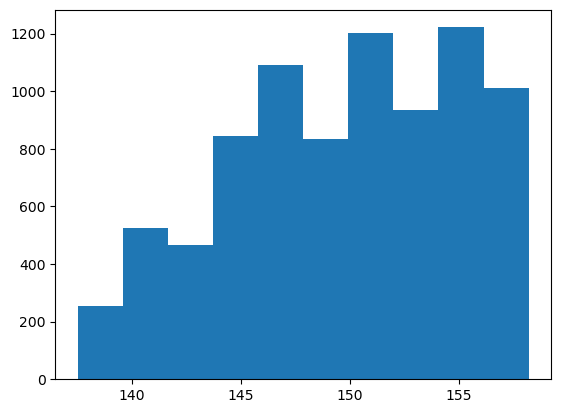

In [324]:
plt.hist(final_df['Nivell absolut (msnm)'])

(array([ 604.,  943., 1247.,  776.,  808., 1143.,  667., 1024.,  665.,
         506.]),
 array([ 21.9 ,  29.71,  37.52,  45.33,  53.14,  60.95,  68.76,  76.57,
         84.38,  92.19, 100.  ]),
 <BarContainer object of 10 artists>)

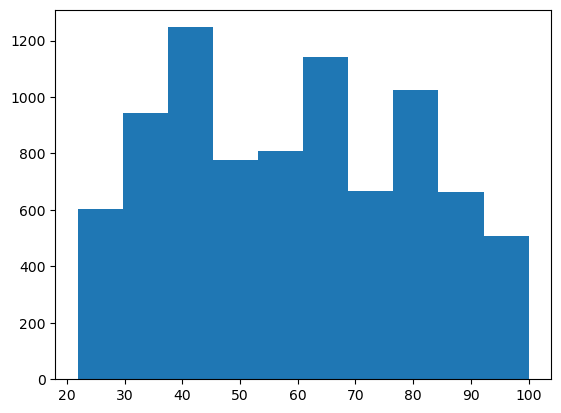

In [287]:
plt.hist(final_df['Percentatge volum embassat (%)'])

(array([ 601.,  946., 1248.,  775.,  808., 1145.,  667., 1028.,  661.,
         504.]),
 array([13.41 , 18.179, 22.948, 27.717, 32.486, 37.255, 42.024, 46.793,
        51.562, 56.331, 61.1  ]),
 <BarContainer object of 10 artists>)

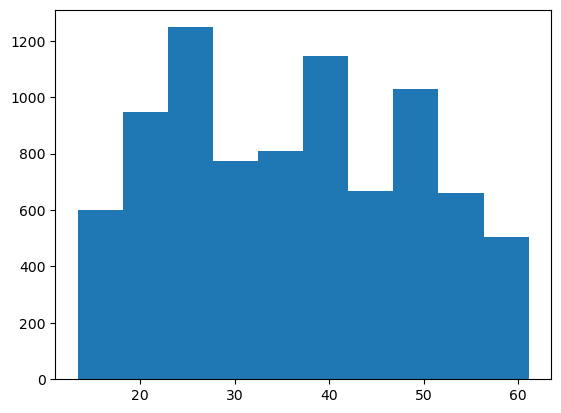

In [289]:
plt.hist(final_df['Volum embassat (hm3)'])

(array([8.273e+03, 7.900e+01, 1.800e+01, 7.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.  ,  32.01,  64.02,  96.03, 128.04, 160.05, 192.06, 224.07,
        256.08, 288.09, 320.1 ]),
 <BarContainer object of 10 artists>)

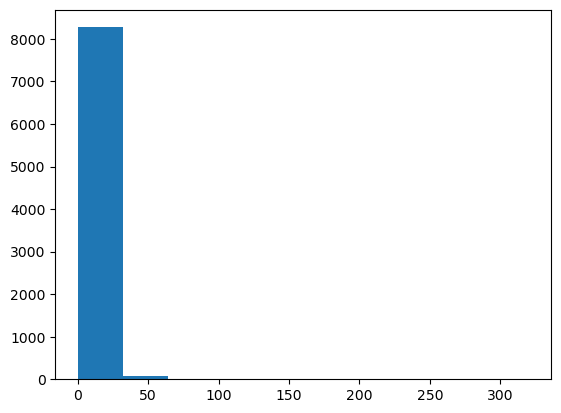

In [349]:
plt.hist(final_df['PPT'])

Veiem que en general totes les dades tenen una distribució més o menys normal.

Farem un cop d'ull al nivell absolut. I aquí veiem com la variació de les dades és més marcada. lo que ens pot ajudar a trobar l'estacionalitat, si n'hi hagués.

Com que les columnes de nivell absolut, percentatge embassat i volum embassat son diferents mesures per medir la capacitat de l'embassament, i només en necessitem una, escollirem la de nivell absolut doncs es la que té una desviació menor segons l'analisi estadistica i podria ajudar-nos a l'hora de fer el nostre model.

Fem una gràfica de tota la serie històrica del nivell absolut de l'embassament i a sota de la precipitació, per veure si trobem alguna relació entre ambdos.

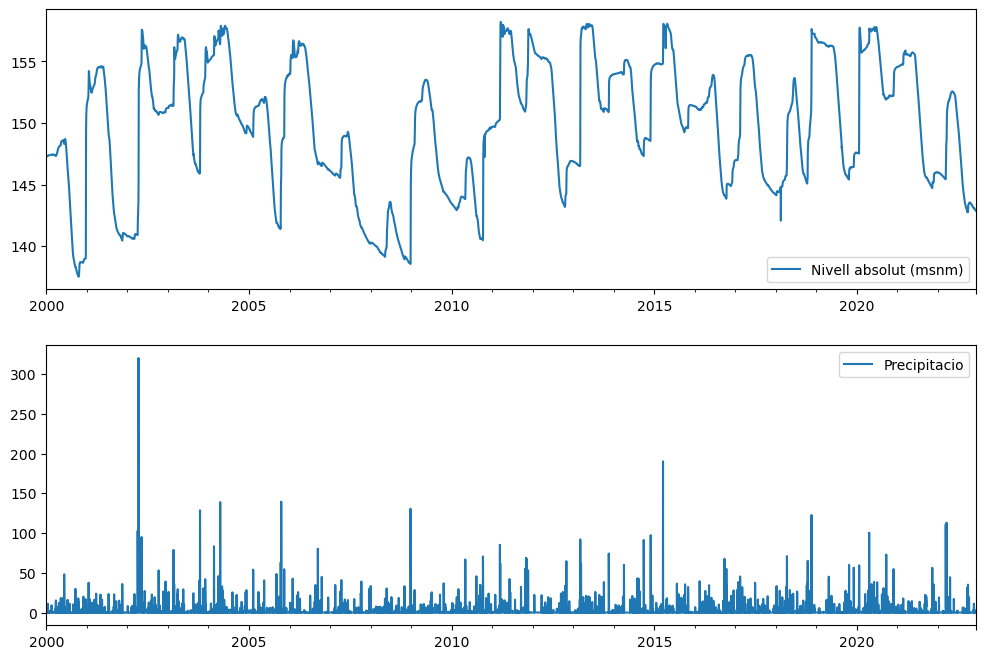

In [351]:
fig,  (ax1, ax2) = plt.subplots(2)
final_df['Nivell absolut (msnm)'].plot(figsize=(12, 8), ax=ax1, label='Nivell absolut (msnm)')
final_df['PPT'].plot(figsize=(12, 8),ax=ax2, label='Precipitacio')
ax1.legend()
ax2.legend()

A simple vista no sembla que n'hi hagi cap. Però com que el dataframe cobreix 22 anys, mirarem de més a prop les dades limitant la seva visualització a un any. Escollirem diversos periodes d'un any al llarg de la serie històrica per comparar el nivell absolut de l'embassament amb la precipitació.

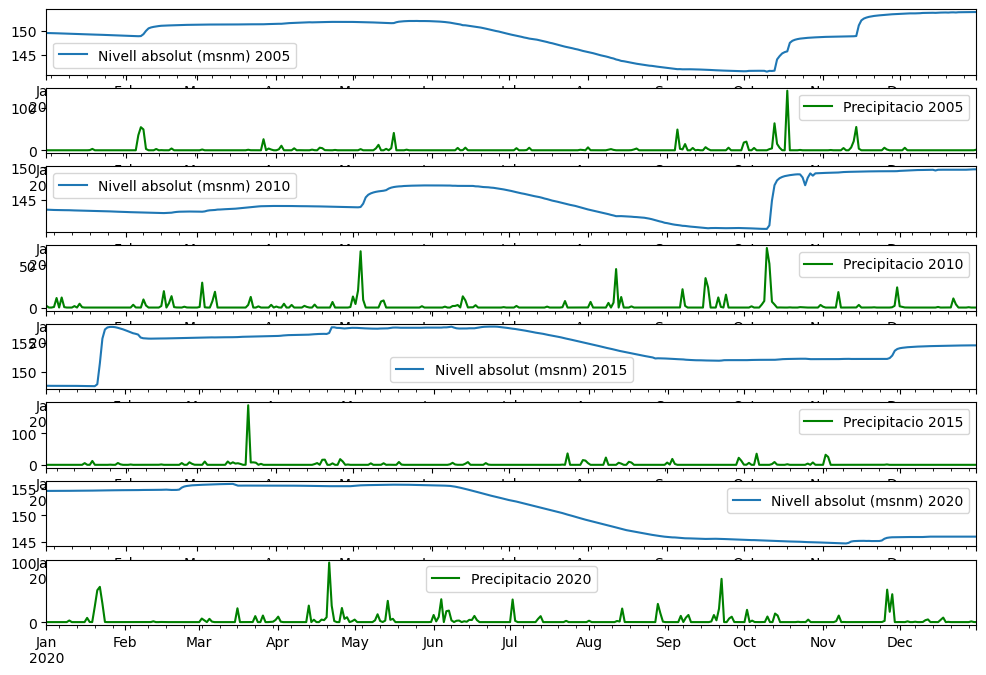

In [343]:
fig,  (ax1, ax2, ax3, ax4, ax5,ax6,ax7,ax8) = plt.subplots(8)
final_df.loc['2005-01-01':'2005-12-31']['Nivell absolut (msnm)'].plot(figsize=(12, 8), ax=ax1, label='Nivell absolut (msnm) 2005')
final_df.loc['2005-01-01':'2005-12-31']['PPT'].plot(figsize=(12, 8), ax=ax2, label='Precipitacio 2005', color='green')
final_df.loc['2010-01-01':'2010-12-31']['Nivell absolut (msnm)'].plot(figsize=(12, 8),ax=ax3, label='Nivell absolut (msnm) 2010')
final_df.loc['2010-01-01':'2010-12-31']['PPT'].plot(figsize=(12, 8),ax=ax4, label='Precipitacio 2010', color='green')
final_df.loc['2020-01-01':'2020-12-31']['Nivell absolut (msnm)'].plot(figsize=(12, 8),ax=ax5, label='Nivell absolut (msnm) 2015')
final_df.loc['2015-01-01':'2015-12-31']['PPT'].plot(figsize=(12, 8),ax=ax6, label='Precipitacio 2015', color='green')
final_df.loc['2021-01-01':'2021-12-31']['Nivell absolut (msnm)'].plot(figsize=(12, 8),ax=ax7, label='Nivell absolut (msnm) 2020')
final_df.loc['2020-01-01':'2020-12-31']['PPT'].plot(figsize=(12, 8),ax=ax8, label='Precipitacio 2020', color='green')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()

A les gràfiques podem veure com no hi ha gaire relació entre la precipitació i el nivell de l'embassament, a excepció del mes d'octubre que en el 2005 i el 2010 coincideix amb un posterior augment del mateix, no sent així al 2015 i al 2020. La resta de l'any sembla ser que la preicipitació no afecta gairebé el nivell de l'embassament. 
Per confirmar les nostres sospites farem a continuació una gràfica de correlació de Pearson a veure quin resultat ens dona.

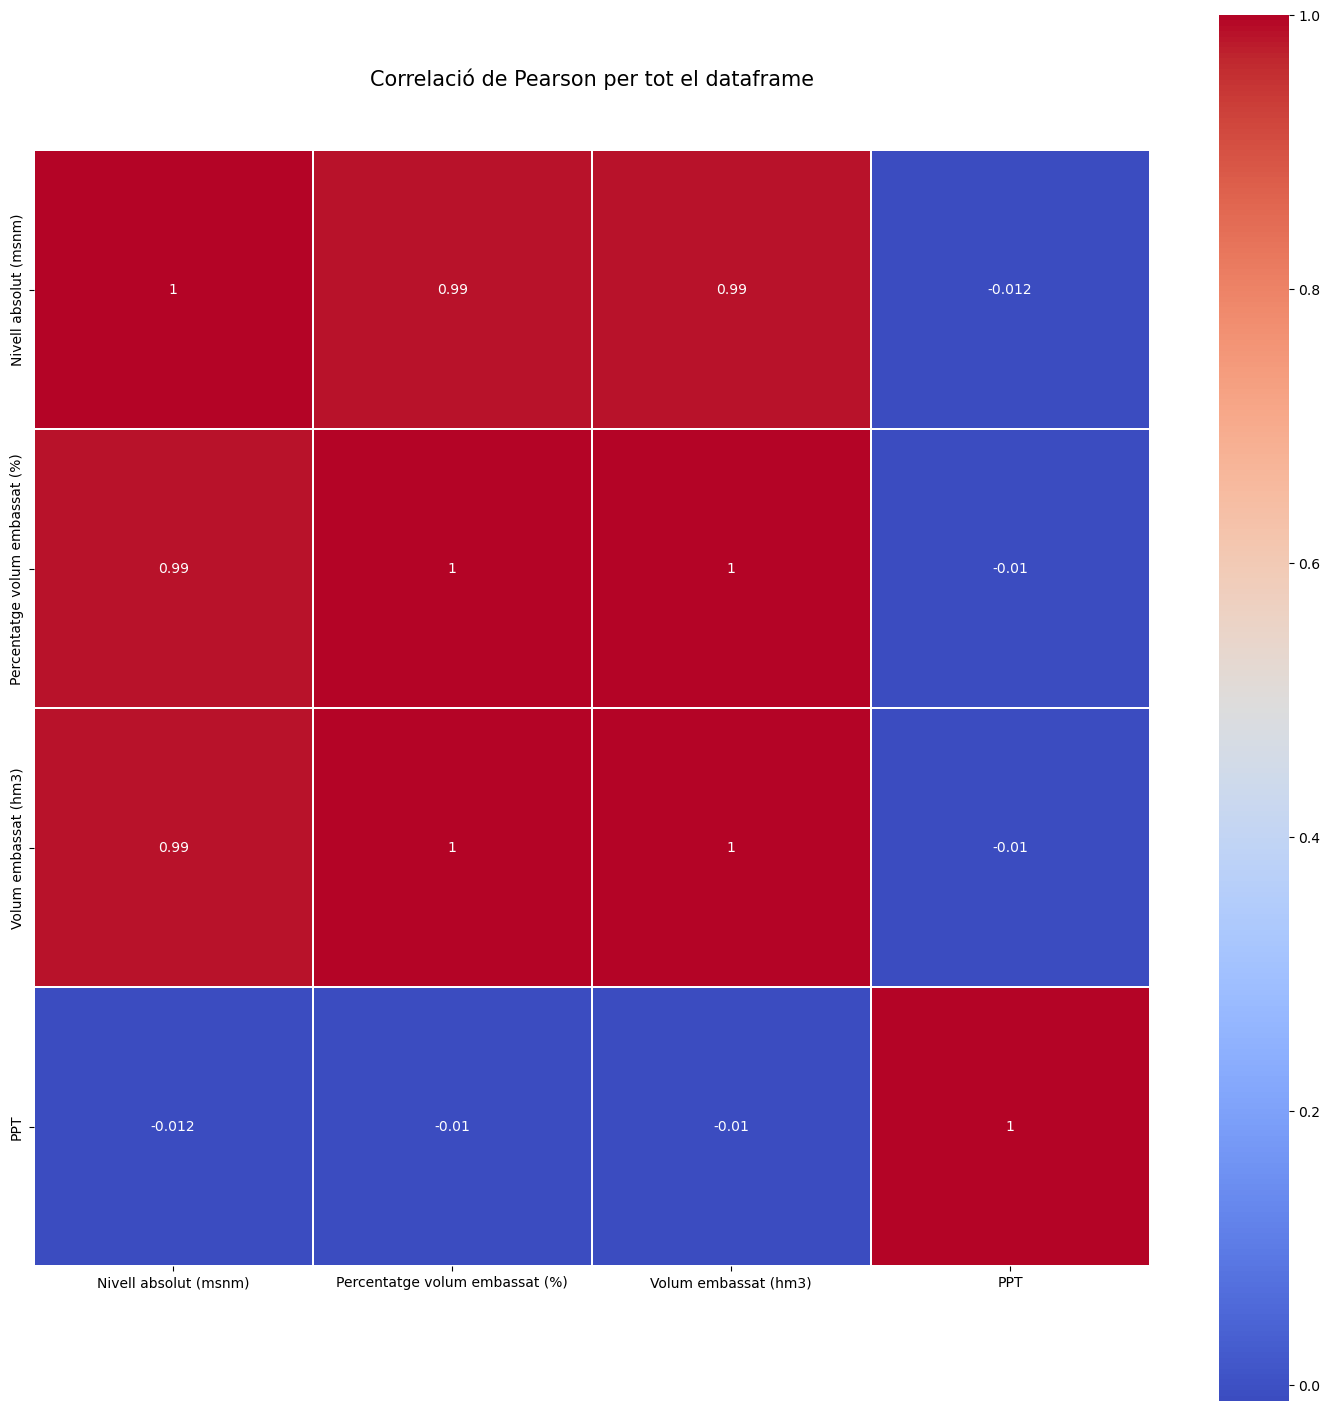

In [337]:
plt.figure(figsize = (18,18))
sns.heatmap(final_df.corr(), linewidths=0.1,vmax=1.0, square = True, cmap = 'coolwarm', 
            linecolor = 'white', annot = True)
plt.title('Correlació de Pearson per tot el dataframe', y=1.05, size = 15); 

Com podem veure al gràfic de correlació, hi ha una correlació negativa molt fluixa entre la precipitació i el nivell de l'embassament. Lo que ens confirma lo que haviem vist previament a les gràfiques anteriors. De manera que la idea inicial de fer servir la precipitació com a variable exogena per millorar el model autoregressiu no ens serà d'utilitat i l'haurem de descartar.

A continuació mirarem de trobar l'estacionalitat del nivell absolut, que serà la dada amb la que treballarem i de la qual volem fer el model predictiu.

Grafiquem diferents periodes d'un any al llarg de la serie històrica. 

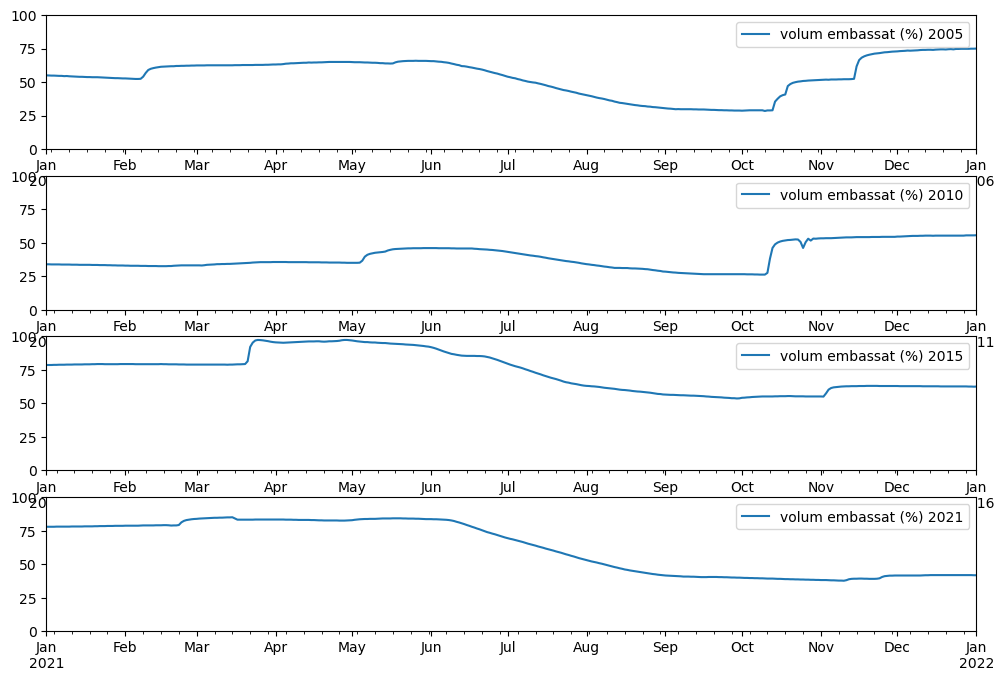

In [344]:
fig,  (ax1, ax2, ax3, ax4) = plt.subplots(4)
final_df.loc['2005-01-01':'2006-01-01']['Percentatge volum embassat (%)'].plot(figsize=(12, 8), ax=ax1, label='volum embassat (%) 2005')
final_df.loc['2010-01-01':'2011-01-01']['Percentatge volum embassat (%)'].plot(figsize=(12, 8),ax=ax2, label='volum embassat (%) 2010')
final_df.loc['2015-01-01':'2016-01-01']['Percentatge volum embassat (%)'].plot(figsize=(12, 8),ax=ax3, label='volum embassat (%) 2015')
final_df.loc['2021-01-01':'2022-01-01']['Percentatge volum embassat (%)'].plot(figsize=(12, 8),ax=ax4, label='volum embassat (%) 2021')
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)
ax3.set_ylim(0, 100)
ax4.set_ylim(0, 100)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

No es veu cap estacionalitat en les dades representades, així que mirarem un periode de dos anys.

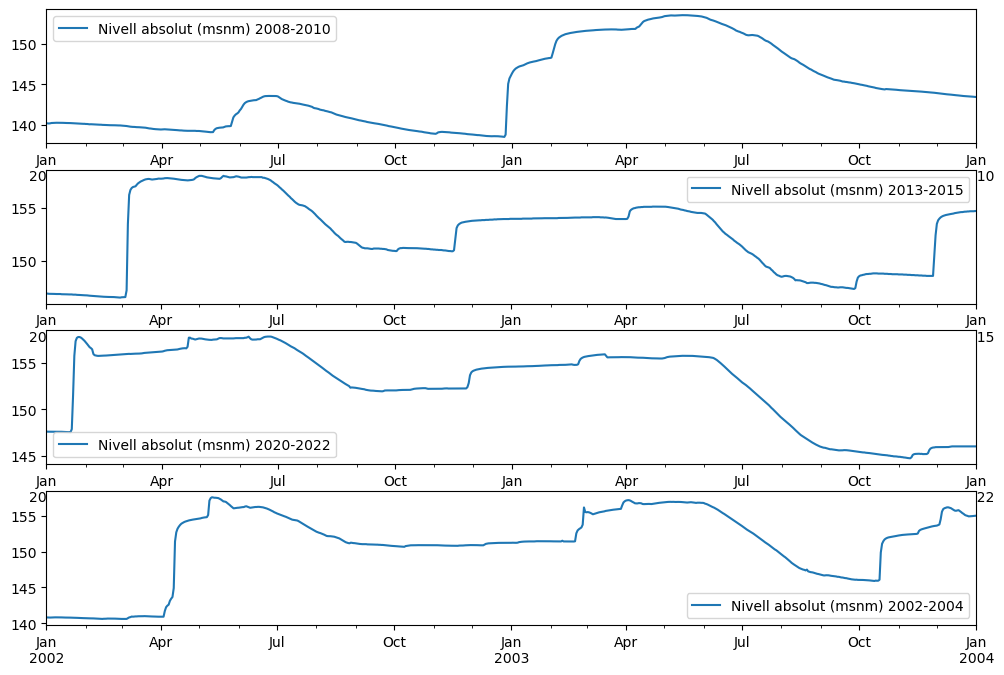

In [345]:
fig,  (ax1, ax2, ax3, ax4) = plt.subplots(4)
final_df.loc['2002-01-01':'2004-01-01']['Nivell absolut (msnm)'].plot(figsize=(12, 8),ax=ax4, label='Nivell absolut (msnm) 2002-2004')
final_df.loc['2008-01-01':'2010-01-01']['Nivell absolut (msnm)'].plot(figsize=(12, 8), ax=ax1, label='Nivell absolut (msnm) 2008-2010')
final_df.loc['2013-01-01':'2015-01-01']['Nivell absolut (msnm)'].plot(figsize=(12, 8),ax=ax2, label='Nivell absolut (msnm) 2013-2015')
final_df.loc['2020-01-01':'2022-01-01']['Nivell absolut (msnm)'].plot(figsize=(12, 8),ax=ax3, label='Nivell absolut (msnm) 2020-2022')


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

Aquí ja es pot percebre una certa estacionalitat, encara que poc marcada, en periode d'uns 8 mesos, de març a septembre i de desembre a juliol.

Farem un cop d'ull a un periode de 4 anys només per confirmar si aquesta estacionalitat que hem vist es repeteix any rere any.

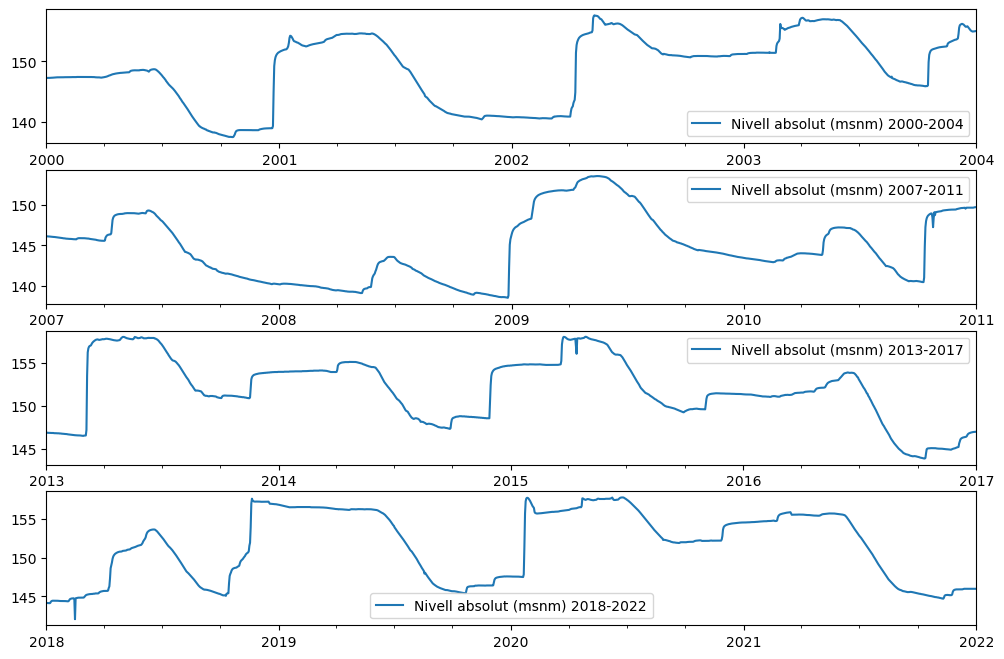

In [354]:
fig,  (ax1, ax2, ax3, ax4) = plt.subplots(4)
final_df.loc['2000-01-01':'2004-01-01']['Nivell absolut (msnm)'].plot(figsize=(12, 8),ax=ax1, label='Nivell absolut (msnm) 2000-2004')
final_df.loc['2007-01-01':'2011-01-01']['Nivell absolut (msnm)'].plot(figsize=(12, 8), ax=ax2, label='Nivell absolut (msnm) 2007-2011')
final_df.loc['2013-01-01':'2017-01-01']['Nivell absolut (msnm)'].plot(figsize=(12, 8),ax=ax3, label='Nivell absolut (msnm) 2013-2017')
final_df.loc['2018-01-01':'2022-01-01']['Nivell absolut (msnm)'].plot(figsize=(12, 8),ax=ax4, label='Nivell absolut (msnm) 2018-2022')


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

Podem veure que encara que de manera irregular, hi ha una certa estacionalitat, que es repeteix de manera periodica, en intervals d'uns 8 mesos aproximadament, encara que no de manera molt marcada.

Com que l'estacionalitat es propera a l'any i no hi ha dues estacions completes dintre d'un mateix any, es considera que no hi ha estacionalitat en la serie històrica.